In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


##### EDV

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df['Price'].nunique()

5000

In [5]:
df['Price'][0]

1059033.5578701235

<AxesSubplot:>

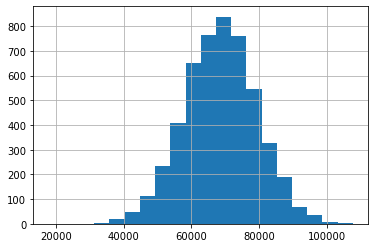

In [6]:
df['Avg. Area Income'].hist(bins=20)

<AxesSubplot:>

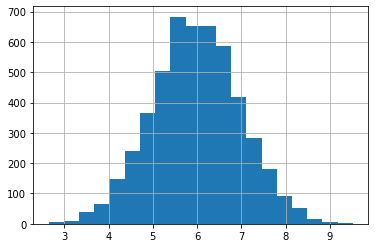

In [7]:
df['Avg. Area House Age'].hist(bins=20)

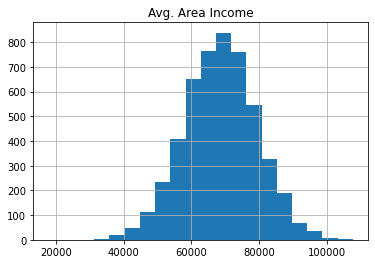

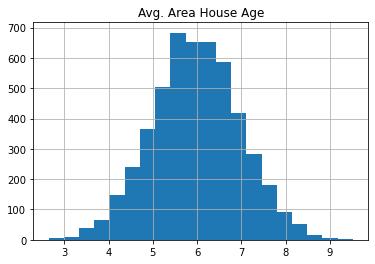

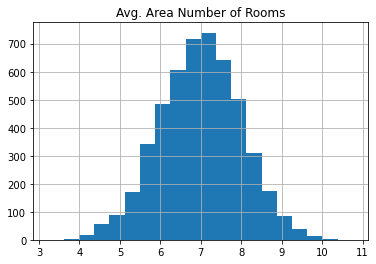

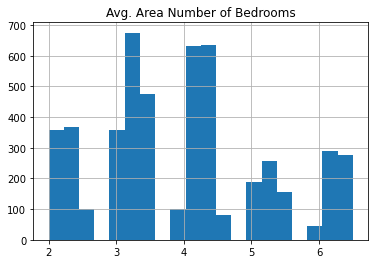

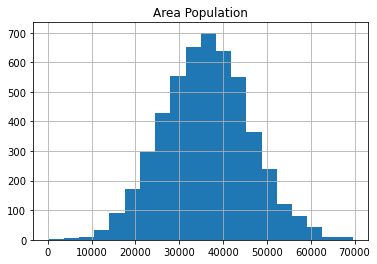

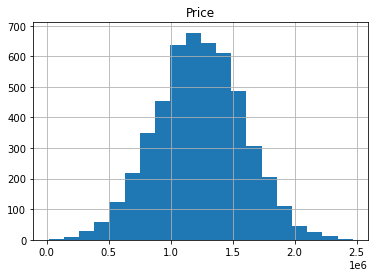

In [8]:
for i in df.columns[:-1]:
    df[i].hist(bins=20)
    plt.title(i)
    plt.show()

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

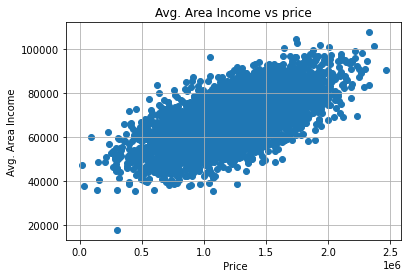

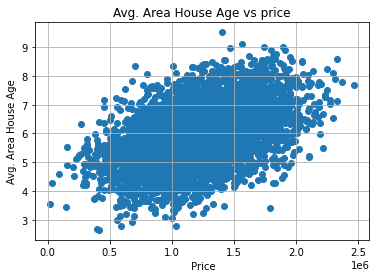

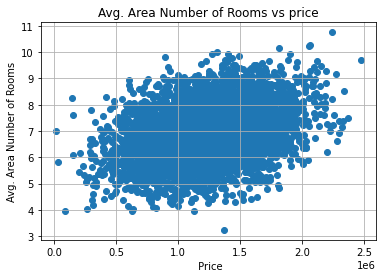

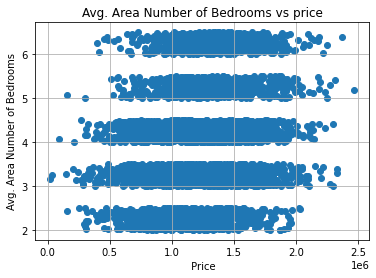

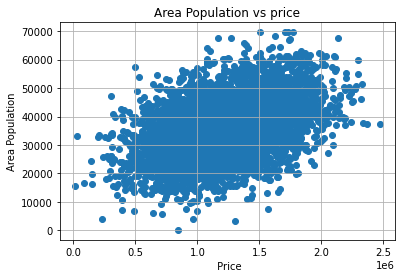

In [10]:
for i in df.columns[:-2]:
    plt.scatter(df['Price'],df[i])
    plt.title(i+' vs price')
    plt.xlabel(' Price')
    plt.ylabel(i)
    plt.grid()
    plt.show()

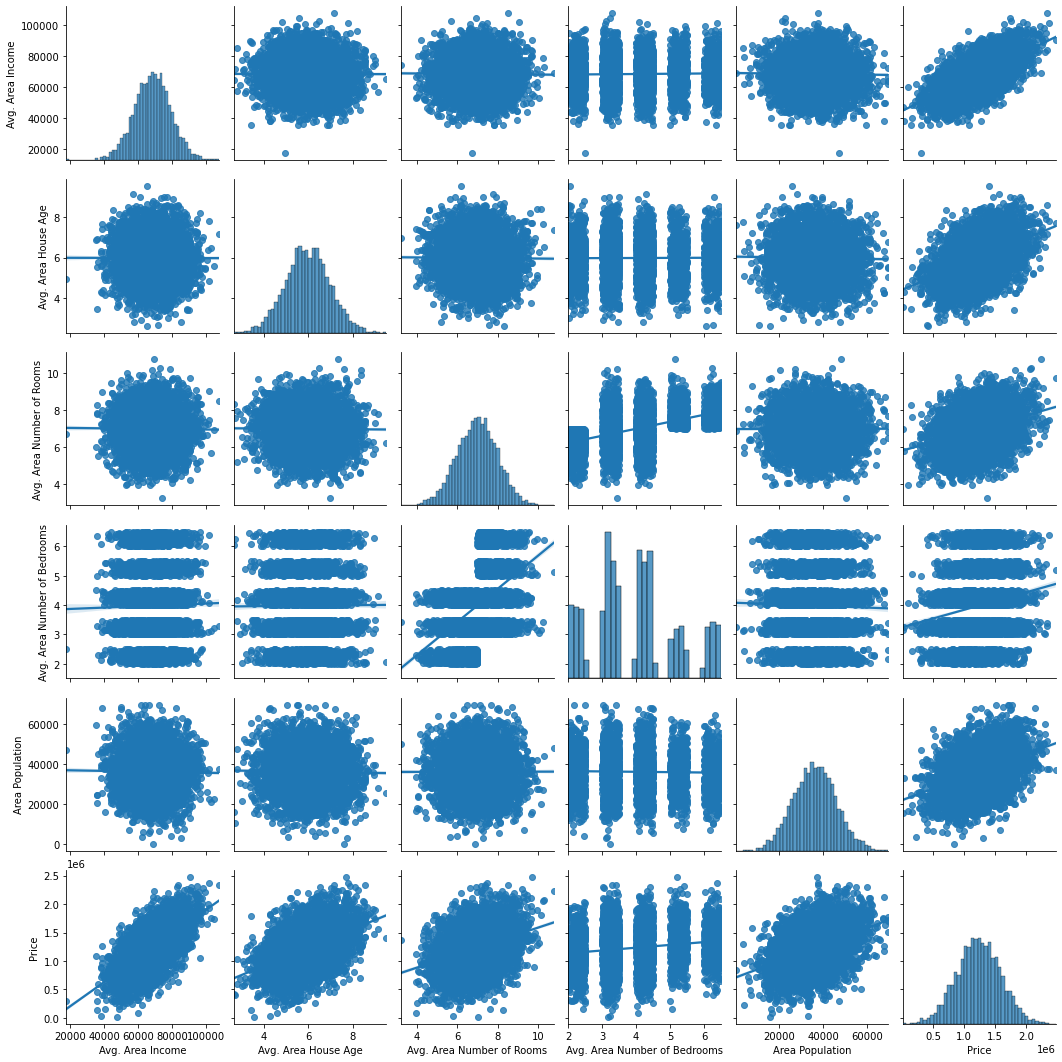

In [11]:
sns.pairplot(df,kind='reg')

In [12]:
df['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [13]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [14]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms' , 'Area Population']]
y=df['Price']

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           5000 non-null   float64
 1   Avg. Area House Age        5000 non-null   float64
 2   Avg. Area Number of Rooms  5000 non-null   float64
 3   Area Population            5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


In [16]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

#### 1. splitting teh data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain , xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=10)

In [19]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 4875 to 1289
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           3750 non-null   float64
 1   Avg. Area House Age        3750 non-null   float64
 2   Avg. Area Number of Rooms  3750 non-null   float64
 3   Area Population            3750 non-null   float64
dtypes: float64(4)
memory usage: 146.5 KB


In [20]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 245 to 1234
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [21]:
ytrain.shape

(3750,)

In [22]:
ytest.shape

(1250,)

In [23]:
xtrain.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
4875,58676.411529,5.978277,5.666757,56269.462943
2773,59046.444231,6.670060,7.335985,37813.714630
4391,50703.152916,6.096813,7.784818,26324.207865
3433,79263.554759,5.185727,6.066881,36164.655454
3764,55593.079806,7.920282,7.976184,42067.693935


#### 2.creating the machine learing model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()

##### 3. training the model with training data

In [26]:
model.fit(xtrain,ytrain)

LinearRegression()

In [27]:
model.coef_

array([2.15919468e+01, 1.65128318e+05, 1.20463708e+05, 1.53368278e+01])

In [28]:
pd.DataFrame(model.coef_,columns=['coef_'],index=x.columns)

,coef_
Avg. Area Income,21.591947
Avg. Area House Age,165128.317665
Avg. Area Number of Rooms,120463.708087
Area Population,15.336828


##### 4. evaluation

In [29]:
print('%.1f%%'%(model.score(xtest,ytest)*100))

91.8%


In [30]:
ypred=model.predict(xtest)
ypred

array([1193899.36335096, 1187262.43784591, 1046347.43872966, ...,
        769979.21424061, 1588323.12890354, 1732539.85447396])

In [31]:
ytest

245     1.118048e+06
4493    1.326947e+06
4583    1.053485e+06
2242    7.590447e+05
3407    1.381118e+06
            ...     
4274    1.779858e+06
2551    1.404541e+06
2476    9.143783e+05
3711    1.479296e+06
1234    1.747245e+06
Name: Price, Length: 1250, dtype: float64

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
print(mean_absolute_error(ytest,ypred))

80728.01465732267


In [34]:
100*mean_absolute_error(ytest,ypred)/ypred[0]

6.761710168832007

##### accuracy=1-error
error=1-accuracy

##### conclusion lets use this model because the accuracy score is more than 90%

##### 5. deployment

In [35]:
final_model=model

In [36]:
pd.to_pickle(final_model,'HousePricePredictor')